In [146]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn

sns.set(style='whitegrid')

data_path =('/Users/Kadibhai/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt')

sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)


In [147]:
#label the columns

sms_raw.columns = ['msg','score']

#create features
keywords = ['great', 'awesome', 'good', 'well', 'fine', 'useful', 'best', 'fantastic', 'excellent','works','very']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.msg.str.contains(
        ' ' + str(key) + ' ',
        case= False
    )

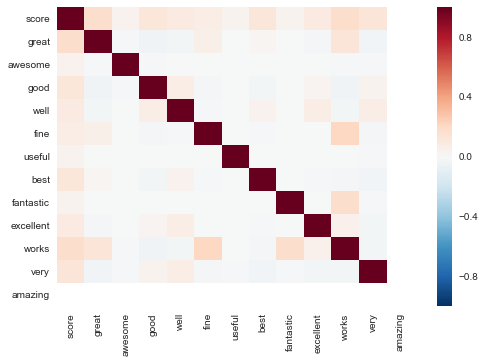

In [148]:
sns.heatmap(sms_raw.corr())

In [149]:
data = sms_raw[keywords]
target = sms_raw['score']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [150]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
    
))

Number of mislabeled points out of a total 1000 points : 361


In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[463,  37],
       [324, 176]])

In [152]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(data, target).predict(data)
print("Number of mislabeled points out of a total %d points : %d"
  % (data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 410
